In [1]:
# Imports
import twint
import nest_asyncio
import numpy as np
import pandas as pa
import sklearn as sk
import keras 
import tensorflow as tf
import json
from pandas_datareader import data
from datetime import datetime
from datetime import timedelta  
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import re
import string

# NLP Packages
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

# This ensures the twint loop can run in jupyter notebook, no need to understand it
nest_asyncio.apply()
pa.set_option('display.max_colwidth', None)

Using TensorFlow backend.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ford\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ford\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ford\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Predetermined Parameters
user = "elonmusk"
tckr = "TSLA"

In [3]:
# Use twint to grab tweets and put into pandas dataframe
c = twint.Config()

c.Username = user
# I don't think the following line is neccessary as inputting to pandas gives us all columns by default
c.Custom["tweet"] = ["id", "username", "created_at", "username", "mentions" , "replies_count", "retweets_count", "likes_count", "hashtags", "tweet"]
c.Pandas = True

twint.run.Search(c)

Tweets_df = twint.storage.panda.Tweets_df

1329939585770676225 2020-11-20 19:08:00 -0500 <elonmusk> What else do they use the Force for? 🤔
1329930453575458819 2020-11-20 18:31:43 -0500 <elonmusk> Gamer Jedi uses the Force to get snacks
1329878876202426371 2020-11-20 15:06:46 -0500 <elonmusk> @vicentes @EvaFoxU @PPathole @mirojurcevic @TashaARK @Space_Station There will always be upgrades
1329877320031756288 2020-11-20 15:00:35 -0500 <elonmusk> @EvaFoxU @PPathole @mirojurcevic @TashaARK @Space_Station It will be better than human vision by quite a margin
1329876619696214016 2020-11-20 14:57:48 -0500 <elonmusk> @enn_nafnlaus @mirojurcevic @TashaARK @Space_Station Reality looks like a strange ghost-world at radar wavelengths. Almost everything except metal is translucent.
1329875954550919168 2020-11-20 14:55:10 -0500 <elonmusk> @PPathole @mirojurcevic @TashaARK @Space_Station Exactly
1329847917834870784 2020-11-20 13:03:45 -0500 <elonmusk> @mirojurcevic @TashaARK This is a misperception. SpaceX developed &amp; continues to use lid

In [4]:
# Show dataframe
Tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1329939585770676225,1329930453575458819,1.605917e+12,2020-11-20 19:08:00,-0500,,What else do they use the Force for? 🤔,en,[],[],...,,,,,,[],,,,
1,1329930453575458819,1329930453575458819,1.605915e+12,2020-11-20 18:31:43,-0500,,Gamer Jedi uses the Force to get snacks,en,[],[],...,,,,,,[],,,,
2,1329878876202426371,1329802442108755972,1.605903e+12,2020-11-20 15:06:46,-0500,,@vicentes @EvaFoxU @PPathole @mirojurcevic @TashaARK @Space_Station There will always be upgrades,en,[],[],...,,,,,,"[{'screen_name': 'vicentes', 'name': 'Cybergrade', 'id': '14290802'}, {'screen_name': 'EvaFoxU', 'name': 'Eva Fox 🦊', 'id': '959471389282578432'}, {'screen_name': 'PPathole', 'name': 'Pranay Pathole', 'id': '1291945442'}, {'screen_name': 'mirojurcevic', 'name': 'Miro Jurcevic', 'id': '958842956'}, {'screen_name': 'TashaARK', 'name': 'Tasha Keeney', 'id': '2263452746'}, {'screen_name': 'Space_Station', 'name': 'Intl. Space Station', 'id': '1451773004'}]",,,,
3,1329877320031756288,1329802442108755972,1.605902e+12,2020-11-20 15:00:35,-0500,,@EvaFoxU @PPathole @mirojurcevic @TashaARK @Space_Station It will be better than human vision by quite a margin,en,[],[],...,,,,,,"[{'screen_name': 'EvaFoxU', 'name': 'Eva Fox 🦊', 'id': '959471389282578432'}, {'screen_name': 'PPathole', 'name': 'Pranay Pathole', 'id': '1291945442'}, {'screen_name': 'mirojurcevic', 'name': 'Miro Jurcevic', 'id': '958842956'}, {'screen_name': 'TashaARK', 'name': 'Tasha Keeney', 'id': '2263452746'}, {'screen_name': 'Space_Station', 'name': 'Intl. Space Station', 'id': '1451773004'}]",,,,
4,1329876619696214016,1329802442108755972,1.605902e+12,2020-11-20 14:57:48,-0500,,@enn_nafnlaus @mirojurcevic @TashaARK @Space_Station Reality looks like a strange ghost-world at radar wavelengths. Almost everything except metal is translucent.,en,[],[],...,,,,,,"[{'screen_name': 'enn_nafnlaus', 'name': 'Nafnlaus', 'id': '1153476318'}, {'screen_name': 'mirojurcevic', 'name': 'Miro Jurcevic', 'id': '958842956'}, {'screen_name': 'TashaARK', 'name': 'Tasha Keeney', 'id': '2263452746'}, {'screen_name': 'Space_Station', 'name': 'Intl. Space Station', 'id': '1451773004'}]",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11505,142881284019060736,142881284019060736,1.322901e+12,2011-12-03 03:22:07,-0500,,That was a total non sequitur btw,en,[],[],...,,,,,,[],,,,
11506,142880871391838208,142880871391838208,1.322900e+12,2011-12-03 03:20:28,-0500,,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",en,[],[],...,,,,,,[],,,,
11507,142188458125963264,142188458125963264,1.322735e+12,2011-12-01 05:29:04,-0500,,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,en,[],[],...,,,,,,[],,,,
11508,142179928203460608,142179928203460608,1.322733e+12,2011-12-01 04:55:11,-0500,,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT",en,[],[],...,,,,,,[],,,,


In [5]:
#  Show columns of dataframe
data_cols = Tweets_df.columns  
    
# display  
data_cols  

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
# Get rid of tweets that are just replies (debatable for futre, we can test)
inds = []
col = Tweets_df['reply_to']
for i in range(Tweets_df.shape[0]):
    x = col[i]
    if x:
        inds.append(i)
# print(inds)
Tweets_df = Tweets_df.drop(inds, inplace = False)
Tweets_df

TypeError: list indices must be integers or slices, not str

In [504]:
# Remove undesirable columns
rems = ['id', 'conversation_id', 'created_at', 'timezone', 'place',
       'language', 'user_id',
       'username', 'name', 'day', 'hour', 'urls', 'photos', 'video',
       'thumbnail', 'quote_url', 'search',
       'near', 'geo', 'source', 'reply_to', 'translate', 'trans_src',
       'trans_dest', 'link', 'user_id_str', 'cashtags']
Rem_Cols = Tweets_df.drop(rems, inplace = False, axis=1)
Rem_Cols.reset_index(drop=True, inplace=True)
Rem_Cols

,date,tweet,hashtags,nlikes,nreplies,nretweets
0,2020-11-06 01:10:41,420 is ten times better than 42,[],103305,4467,11110
1,2020-11-06 00:55:31,🤗,[],20201,780,435
2,2020-11-05 17:39:34,@LinusTech @SpaceXStarlink @SpaceX Awaiting approval from Canadian authorities,[],11665,270,186
3,2020-11-05 04:31:58,Recruiting ace engineers for Giga Berlin! Will interview in person tomorrow on site. Send resume to 25Guns@Tesla.com.,[],85675,2939,5312
4,2020-11-05 02:59:44,@Chad_Hurley @realDonaldTrump @kanyewest Stop being a chad,[],2457,114,80
...,...,...,...,...,...,...
11317,2011-12-03 03:22:07,That was a total non sequitur btw,[],10,2,4
11318,2011-12-03 03:20:28,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",[],30,2,25
11319,2011-12-01 05:29:04,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,[],57,15,8
11320,2011-12-01 04:55:11,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT",[],168,17,15


In [505]:
# Get stock data in range we will be using (calling yahoo once for a set of data that contains unwated values is far more efficient, trust me)
col = Rem_Cols['date']
# print(col)
end1 = (datetime.strptime(col[0], '%Y-%m-%d %H:%M:%S') + timedelta(days=3)).date()
start1 = (datetime.strptime(col[Rem_Cols.shape[0]-1], '%Y-%m-%d %H:%M:%S') + timedelta(days=-7)).date()

end = (datetime.strptime(col[0], '%Y-%m-%d %H:%M:%S') + timedelta(days=3)).date().strftime('%Y-%m-%d')
start = (datetime.strptime(col[Rem_Cols.shape[0]-1], '%Y-%m-%d %H:%M:%S') + timedelta(days=-7)).date().strftime('%Y-%m-%d')
panel_data = data.DataReader(tckr, 'yahoo', start, end)["Adj Close"]

inds = []
keys = panel_data.keys()
col = Rem_Cols['date']
for i in range(Rem_Cols.shape[0]):
    x = col[i]
    # print(datetime.strptime(x, '%Y-%m-%d %H:%M:%S') < keys[0])
    if (datetime.strptime(x, '%Y-%m-%d %H:%M:%S') < keys[0] or datetime.strptime(x, '%Y-%m-%d %H:%M:%S') > (datetime.today() + timedelta(days=-3))):
        inds.append(i)
tweets = Rem_Cols.drop(inds, inplace = False, axis=0)
# print(panel_data[end])
tweets.reset_index(drop=True, inplace=True)
tweets

,date,tweet,hashtags,nlikes,nreplies,nretweets
0,2020-11-03 13:19:08,"@jtrevorchapman Yeah, that will be relatively easy, as so few users out in the ocean",[],1908,126,53
1,2020-11-03 10:10:08,"@ICannot_Enough @ZainRaz4 @vincent13031925 @JonErlichman Yes, although I didn’t expect the stock to rise so much so soon. The reason for the stock options is that they’re needed to help pay for humanity to get to Mars in 10 to 20 years.",[],3774,229,232
2,2020-11-03 10:03:24,"@FutureJurvetson @PPathole Super appreciate your support, Steve! That convertible loan gave us 6 months of runway. Fortunately, Daimler invested $50M in May 2009, 5 months later.",[],1875,65,74
3,2020-11-03 09:59:17,@ZainRaz4 @vincent13031925 @JonErlichman Closest we got was about a month. The Model 3 ramp was extreme stress &amp; pain for a long time — from mid 2017 to mid 2019. Production &amp; logistics hell.,[],2412,115,107
4,2020-11-03 09:53:45,"@vincent13031925 @JonErlichman I put in my last money, even though I thought we would still fail. But, it was either that or certain death for Tesla. Extremely difficult to raise money for an electric car startup (considered super quirky back then), while stalwarts like GM &amp; Chrysler were going bankrupt.",[],6070,232,370
...,...,...,...,...,...,...
11309,2011-12-03 22:33:52,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,[],55,9,10
11310,2011-12-03 03:22:07,That was a total non sequitur btw,[],10,2,4
11311,2011-12-03 03:20:28,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",[],30,2,25
11312,2011-12-01 05:29:04,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,[],57,15,8


In [506]:
# Acquire percent change of the closing prices surrounding each tweet and add to dataframe
percs = []
col = tweets['date']
for i in range(tweets.shape[0]):
    x = col[i]
    end_date = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

    if (end_date.hour > 15):
        end_date = end_date + timedelta(days=1)
    start_date = end_date + timedelta(days=-1)

    while (end_date.date() not in panel_data) or (end_date.weekday() == 5) or (end_date.weekday() == 6):
        end_date = end_date + timedelta(days=1) 
    while (start_date.date() not in panel_data) or (start_date.weekday() == 5) or (start_date.weekday() == 6):
        start_date = start_date + timedelta(days=-1)
    end_date = end_date.date().strftime('%Y-%m-%d')
    start_date = start_date.date().strftime('%Y-%m-%d')
    percs.append((panel_data[end_date] - panel_data[start_date])/panel_data[start_date])

tweets['Percent Change'] = percs
tweets

,date,tweet,hashtags,nlikes,nreplies,nretweets,Percent Change
0,2020-11-03 13:19:08,"@jtrevorchapman Yeah, that will be relatively easy, as so few users out in the ocean",[],1908,126,53,0.058400
1,2020-11-03 10:10:08,"@ICannot_Enough @ZainRaz4 @vincent13031925 @JonErlichman Yes, although I didn’t expect the stock to rise so much so soon. The reason for the stock options is that they’re needed to help pay for humanity to get to Mars in 10 to 20 years.",[],3774,229,232,0.058400
2,2020-11-03 10:03:24,"@FutureJurvetson @PPathole Super appreciate your support, Steve! That convertible loan gave us 6 months of runway. Fortunately, Daimler invested $50M in May 2009, 5 months later.",[],1875,65,74,0.058400
3,2020-11-03 09:59:17,@ZainRaz4 @vincent13031925 @JonErlichman Closest we got was about a month. The Model 3 ramp was extreme stress &amp; pain for a long time — from mid 2017 to mid 2019. Production &amp; logistics hell.,[],2412,115,107,0.058400
4,2020-11-03 09:53:45,"@vincent13031925 @JonErlichman I put in my last money, even though I thought we would still fail. But, it was either that or certain death for Tesla. Extremely difficult to raise money for an electric car startup (considered super quirky back then), while stalwarts like GM &amp; Chrysler were going bankrupt.",[],6070,232,370,0.058400
...,...,...,...,...,...,...,...
11309,2011-12-03 22:33:52,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,[],55,9,10,0.033634
11310,2011-12-03 03:22:07,That was a total non sequitur btw,[],10,2,4,0.033634
11311,2011-12-03 03:20:28,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",[],30,2,25,0.033634
11312,2011-12-01 05:29:04,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,[],57,15,8,-0.004276


In [509]:
# Tweet cleaning helper methods
def cleanTxt(text):
    # Get rid of @s, links, Hashtag, and RT
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text))
    text = re.sub(r'#', '', str(text))
    text = re.sub(r'RT[\s]+', '', str(text))
    text = re.sub(r'https?:\/\/\S+', '', str(text))

    # Lowercase and remove punctuation
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)
    tokens_without_sw = [word for word in tokens if word not in stopwords.words()]
    return " ".join(tokens_without_sw)

In [508]:
tweets['tweet'] = tweets['tweet'].apply(cleanTxt)
# tweets['tweet'] = tweets['tweet'].apply(removeStopWords)
tweets

KeyboardInterrupt: 

In [510]:
# Sentiment score helpers
def sentimentScoreNeg(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    return score['neg']

def sentimentScorePos(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    return score['pos']

def sentimentScoreNeu(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    return score['neu']
tweets

,date,tweet,hashtags,nlikes,nreplies,nretweets,Percent Change
0,2020-11-03 13:19:08,"@jtrevorchapman Yeah, that will be relatively easy, as so few users out in the ocean",[],1908,126,53,0.058400
1,2020-11-03 10:10:08,"@ICannot_Enough @ZainRaz4 @vincent13031925 @JonErlichman Yes, although I didn’t expect the stock to rise so much so soon. The reason for the stock options is that they’re needed to help pay for humanity to get to Mars in 10 to 20 years.",[],3774,229,232,0.058400
2,2020-11-03 10:03:24,"@FutureJurvetson @PPathole Super appreciate your support, Steve! That convertible loan gave us 6 months of runway. Fortunately, Daimler invested $50M in May 2009, 5 months later.",[],1875,65,74,0.058400
3,2020-11-03 09:59:17,@ZainRaz4 @vincent13031925 @JonErlichman Closest we got was about a month. The Model 3 ramp was extreme stress &amp; pain for a long time — from mid 2017 to mid 2019. Production &amp; logistics hell.,[],2412,115,107,0.058400
4,2020-11-03 09:53:45,"@vincent13031925 @JonErlichman I put in my last money, even though I thought we would still fail. But, it was either that or certain death for Tesla. Extremely difficult to raise money for an electric car startup (considered super quirky back then), while stalwarts like GM &amp; Chrysler were going bankrupt.",[],6070,232,370,0.058400
...,...,...,...,...,...,...,...
11309,2011-12-03 22:33:52,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,[],55,9,10,0.033634
11310,2011-12-03 03:22:07,That was a total non sequitur btw,[],10,2,4,0.033634
11311,2011-12-03 03:20:28,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",[],30,2,25,0.033634
11312,2011-12-01 05:29:04,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,[],57,15,8,-0.004276


In [511]:
tweets['NegScore'] = tweets['tweet'].apply(sentimentScoreNeg)
tweets['NeuScore'] = tweets['tweet'].apply(sentimentScoreNeu)
tweets['PosScore'] = tweets['tweet'].apply(sentimentScorePos)
tweets

,date,tweet,hashtags,nlikes,nreplies,nretweets,Percent Change,NegScore,NeuScore,PosScore
0,2020-11-03 13:19:08,"@jtrevorchapman Yeah, that will be relatively easy, as so few users out in the ocean",[],1908,126,53,0.058400,0.000,0.718,0.282
1,2020-11-03 10:10:08,"@ICannot_Enough @ZainRaz4 @vincent13031925 @JonErlichman Yes, although I didn’t expect the stock to rise so much so soon. The reason for the stock options is that they’re needed to help pay for humanity to get to Mars in 10 to 20 years.",[],3774,229,232,0.058400,0.032,0.845,0.123
2,2020-11-03 10:03:24,"@FutureJurvetson @PPathole Super appreciate your support, Steve! That convertible loan gave us 6 months of runway. Fortunately, Daimler invested $50M in May 2009, 5 months later.",[],1875,65,74,0.058400,0.000,0.686,0.314
3,2020-11-03 09:59:17,@ZainRaz4 @vincent13031925 @JonErlichman Closest we got was about a month. The Model 3 ramp was extreme stress &amp; pain for a long time — from mid 2017 to mid 2019. Production &amp; logistics hell.,[],2412,115,107,0.058400,0.284,0.716,0.000
4,2020-11-03 09:53:45,"@vincent13031925 @JonErlichman I put in my last money, even though I thought we would still fail. But, it was either that or certain death for Tesla. Extremely difficult to raise money for an electric car startup (considered super quirky back then), while stalwarts like GM &amp; Chrysler were going bankrupt.",[],6070,232,370,0.058400,0.218,0.648,0.134
...,...,...,...,...,...,...,...,...,...,...
11309,2011-12-03 22:33:52,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,[],55,9,10,0.033634,0.000,0.592,0.408
11310,2011-12-03 03:22:07,That was a total non sequitur btw,[],10,2,4,0.033634,0.000,1.000,0.000
11311,2011-12-03 03:20:28,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",[],30,2,25,0.033634,0.186,0.505,0.309
11312,2011-12-01 05:29:04,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,[],57,15,8,-0.004276,0.000,1.000,0.000


In [512]:
# Determine if tweet is about tesla
def isAboutTesla(text):
    flag = 0
    myList = ["Tesla" in text, "tesla" in text, "TESLA" in text, "TSLA" in text]

    if any(myList):
        flag = .3

    return flag

In [513]:
tweets['TeslaFlag'] = tweets['tweet'].apply(isAboutTesla)
tweets

,date,tweet,hashtags,nlikes,nreplies,nretweets,Percent Change,NegScore,NeuScore,PosScore,TeslaFlag
0,2020-11-03 13:19:08,"@jtrevorchapman Yeah, that will be relatively easy, as so few users out in the ocean",[],1908,126,53,0.058400,0.000,0.718,0.282,0.0
1,2020-11-03 10:10:08,"@ICannot_Enough @ZainRaz4 @vincent13031925 @JonErlichman Yes, although I didn’t expect the stock to rise so much so soon. The reason for the stock options is that they’re needed to help pay for humanity to get to Mars in 10 to 20 years.",[],3774,229,232,0.058400,0.032,0.845,0.123,0.0
2,2020-11-03 10:03:24,"@FutureJurvetson @PPathole Super appreciate your support, Steve! That convertible loan gave us 6 months of runway. Fortunately, Daimler invested $50M in May 2009, 5 months later.",[],1875,65,74,0.058400,0.000,0.686,0.314,0.0
3,2020-11-03 09:59:17,@ZainRaz4 @vincent13031925 @JonErlichman Closest we got was about a month. The Model 3 ramp was extreme stress &amp; pain for a long time — from mid 2017 to mid 2019. Production &amp; logistics hell.,[],2412,115,107,0.058400,0.284,0.716,0.000,0.0
4,2020-11-03 09:53:45,"@vincent13031925 @JonErlichman I put in my last money, even though I thought we would still fail. But, it was either that or certain death for Tesla. Extremely difficult to raise money for an electric car startup (considered super quirky back then), while stalwarts like GM &amp; Chrysler were going bankrupt.",[],6070,232,370,0.058400,0.218,0.648,0.134,0.3
...,...,...,...,...,...,...,...,...,...,...,...
11309,2011-12-03 22:33:52,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,[],55,9,10,0.033634,0.000,0.592,0.408,0.0
11310,2011-12-03 03:22:07,That was a total non sequitur btw,[],10,2,4,0.033634,0.000,1.000,0.000,0.0
11311,2011-12-03 03:20:28,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",[],30,2,25,0.033634,0.186,0.505,0.309,0.0
11312,2011-12-01 05:29:04,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,[],57,15,8,-0.004276,0.000,1.000,0.000,0.0


In [514]:
# for i in range(tweets.shape[0]):
#     print(tweets['tweet'][i])
cleaned_tweets = tweets['tweet'].apply(cleanTxt)
tweets.drop(['date', 'tweet', 'hashtags'], inplace = True, axis=1)
tweets

,nlikes,nreplies,nretweets,Percent Change,NegScore,NeuScore,PosScore,TeslaFlag
0,1908,126,53,0.058400,0.000,0.718,0.282,0.0
1,3774,229,232,0.058400,0.032,0.845,0.123,0.0
2,1875,65,74,0.058400,0.000,0.686,0.314,0.0
3,2412,115,107,0.058400,0.284,0.716,0.000,0.0
4,6070,232,370,0.058400,0.218,0.648,0.134,0.3
...,...,...,...,...,...,...,...,...
11309,55,9,10,0.033634,0.000,0.592,0.408,0.0
11310,10,2,4,0.033634,0.000,1.000,0.000,0.0
11311,30,2,25,0.033634,0.186,0.505,0.309,0.0
11312,57,15,8,-0.004276,0.000,1.000,0.000,0.0


In [518]:
cleaned_tweets

0                                                                                                                                                                                      yeah relatively easy users ocean
1                                                                                                enough yes although ’ expect stock rise much soon reason stock options ’ needed help pay humanity get mars 10 20 years
2                                                                                      super appreciate support steve convertible loan gave us 6 months runway fortunately daimler invested 50m may 2009 5 months later
3                                                                                                    closest got month model 3 ramp extreme stress amp pain long time — mid 2017 mid 2019 production amp logistics hell
4        put last money even though thought would still fail either certain death tesla extremely difficult raise money electric car sta

In [519]:
# Create clear cut clusters for positive v negative change
def percChangeAssign(perc):
    if perc >= 0:
        return 1
    else:
        return 0

In [520]:
tweets_edit = tweets.copy()
tweets_edit['Percent Change'] = tweets_edit['Percent Change'].apply(percChangeAssign)
tweets

,nlikes,nreplies,nretweets,Percent Change,NegScore,NeuScore,PosScore,TeslaFlag
0,1908,126,53,0.058400,0.000,0.718,0.282,0.0
1,3774,229,232,0.058400,0.032,0.845,0.123,0.0
2,1875,65,74,0.058400,0.000,0.686,0.314,0.0
3,2412,115,107,0.058400,0.284,0.716,0.000,0.0
4,6070,232,370,0.058400,0.218,0.648,0.134,0.3
...,...,...,...,...,...,...,...,...
11309,55,9,10,0.033634,0.000,0.592,0.408,0.0
11310,10,2,4,0.033634,0.000,1.000,0.000,0.0
11311,30,2,25,0.033634,0.186,0.505,0.309,0.0
11312,57,15,8,-0.004276,0.000,1.000,0.000,0.0


In [521]:
tweets_clust = tweets_edit.copy()
scaler = MinMaxScaler(feature_range=(0,1))
nlikes = scaler.fit_transform(tweets_clust['nlikes'].values.reshape(-1,1))
tweets_clust['nlikes'] = nlikes
nreplies = scaler.fit_transform(tweets_clust['nreplies'].values.reshape(-1,1))
tweets_clust['nreplies'] = nreplies
nretweets = scaler.fit_transform(tweets_clust['nretweets'].values.reshape(-1,1))
tweets_clust['nretweets'] = nretweets
scaler = MinMaxScaler(feature_range=(0,1))
neg = scaler.fit_transform(tweets_clust['NegScore'].values.reshape(-1,1))
tweets_clust['NegScore'] = neg
neu = scaler.fit_transform(tweets_clust['NeuScore'].values.reshape(-1,1))
tweets_clust['NeuScore'] = neu
pos = scaler.fit_transform(tweets_clust['PosScore'].values.reshape(-1,1))
tweets_clust['PosScore'] = pos
tweets_clust

,nlikes,nreplies,nretweets,Percent Change,NegScore,NeuScore,PosScore,TeslaFlag
0,0.001160,0.002642,0.000142,1,0.000,0.718,0.282,0.0
1,0.002295,0.004801,0.000620,1,0.032,0.845,0.123,0.0
2,0.001140,0.001363,0.000198,1,0.000,0.686,0.314,0.0
3,0.001466,0.002411,0.000286,1,0.284,0.716,0.000,0.0
4,0.003691,0.004864,0.000990,1,0.218,0.648,0.134,0.3
...,...,...,...,...,...,...,...,...
11309,0.000033,0.000189,0.000027,1,0.000,0.592,0.408,0.0
11310,0.000005,0.000042,0.000011,1,0.000,1.000,0.000,0.0
11311,0.000018,0.000042,0.000067,1,0.186,0.505,0.309,0.0
11312,0.000034,0.000314,0.000021,0,0.000,1.000,0.000,0.0


In [522]:
# Grab the "Answers"
answers = tweets_clust['Percent Change'].values
print(answers)
tweets_clust.drop(['Percent Change'], inplace = True, axis=1)
tweets_clust

[1 1 1 ... 1 0 0]


,nlikes,nreplies,nretweets,NegScore,NeuScore,PosScore,TeslaFlag
0,0.001160,0.002642,0.000142,0.000,0.718,0.282,0.0
1,0.002295,0.004801,0.000620,0.032,0.845,0.123,0.0
2,0.001140,0.001363,0.000198,0.000,0.686,0.314,0.0
3,0.001466,0.002411,0.000286,0.284,0.716,0.000,0.0
4,0.003691,0.004864,0.000990,0.218,0.648,0.134,0.3
...,...,...,...,...,...,...,...
11309,0.000033,0.000189,0.000027,0.000,0.592,0.408,0.0
11310,0.000005,0.000042,0.000011,0.000,1.000,0.000,0.0
11311,0.000018,0.000042,0.000067,0.186,0.505,0.309,0.0
11312,0.000034,0.000314,0.000021,0.000,1.000,0.000,0.0


In [534]:
n_clusters = 6
# len(np.unique(y))

kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit(tweets_clust)
y_pred_kmeans = kmeans.predict(tweets_clust)
# Evaluate the K-Means clustering accuracy.
# metrics.acc(y, y_pred_kmeans)
num = 11313
print(y_pred_kmeans)
print(answers)
if n_clusters == 2:
    print(np.sum(y_pred_kmeans[0:num]))
    print(np.sum(answers[0:num]))
    print(sk.metrics.accuracy_score(answers[0:num], y_pred_kmeans[0:num]))
    print(sk.metrics.recall_score(answers[0:num], y_pred_kmeans[0:num]))
    print(sk.metrics.precision_score(answers[0:num], y_pred_kmeans[0:num]))
tweets_results = tweets.copy()
tweets_results['cluster'] = y_pred_kmeans
tweets_results

[4 4 1 ... 1 0 1]
[1 1 1 ... 1 0 0]


,nlikes,nreplies,nretweets,Percent Change,NegScore,NeuScore,PosScore,TeslaFlag,cluster
0,1908,126,53,0.058400,0.000,0.718,0.282,0.0,4
1,3774,229,232,0.058400,0.032,0.845,0.123,0.0,4
2,1875,65,74,0.058400,0.000,0.686,0.314,0.0,1
3,2412,115,107,0.058400,0.284,0.716,0.000,0.0,2
4,6070,232,370,0.058400,0.218,0.648,0.134,0.3,3
...,...,...,...,...,...,...,...,...,...
11309,55,9,10,0.033634,0.000,0.592,0.408,0.0,1
11310,10,2,4,0.033634,0.000,1.000,0.000,0.0,0
11311,30,2,25,0.033634,0.186,0.505,0.309,0.0,1
11312,57,15,8,-0.004276,0.000,1.000,0.000,0.0,0


In [535]:
clust_0 = tweets_results.loc[tweets_results['cluster'] == 0] 
inds = clust_0.index
print("")
print("")
print("")
print("")
print("Clust ", 0)
for j in inds:
    print(cleaned_tweets[j])
clusts = pa.DataFrame(data=clust_0.mean(axis=0))
for i in range(1,n_clusters):
    clust_i = tweets_results.loc[tweets_results['cluster'] == i] 
    inds = clust_i.index
    print("")
    print("")
    print("")
    print("")
    print("Clust ", i)
    for j in inds:
        print(cleaned_tweets[j])
    # clust_1 = tweets_results.loc[tweets_results['cluster'] == 1]
    # clust_2 = tweets_results.loc[tweets_results['cluster'] == 2] 
    # clust_3 = tweets_results.loc[tweets_results['cluster'] == 3]
    # clust_4 = tweets_results.loc[tweets_results['cluster'] == 4] 
    # clust_5 = tweets_results.loc[tweets_results['cluster'] == 5]
    # print("Cluster 0\n", clust_0.shape, "\n",clust_0.mean(axis=0))
    # print("Cluster 1\n", clust_1.shape, "\n",clust_1.mean(axis=0))
    # print("Cluster 2\n", clust_2.shape, "\n",clust_2.mean(axis=0))
    # print("Cluster 3\n", clust_3.shape, "\n",clust_3.mean(axis=0))
    # print("Cluster 4\n", clust_4.shape, "\n",clust_4.mean(axis=0))
    # print("Cluster 5\n", clust_5.shape, "\n",clust_5.mean(axis=0))
    
    clusts[i] = clust_i.mean(axis=0)
clusts





Clust  0
arne canada norway next get us early beta
several thousand starlink beta participation invitations going week
close actual expected flight
lockyer could excited new supercollider said considerably larger ’ think necessarily requires much incremental engineering
penguin random house 😴 change random penguin🔥

lord …
minor
… sweden still right zero deaths oct 29
accurate

😉
sci urf smōl
long time
might buy jack box footstool
approximately lograte
bot change setting “ combat ”
little crane “ toy ”
🤣🤣
jack box double duty sperm donor clinic — 👌

bettern nothin ur 💰 back
💫 🛰
testing covid license print money
feed sigh … new supersonic jet time electric
days ahead
’ boca every week maybe could talk given starship exactly subtle design clarification match people already see
sanders working needs able fart cars command
starship coming together
price change pushed thursday next week applies us week clock start countries beta released fsd monthly rental available sometime next year
s

,0,1,2,3,4,5
nlikes,21627.817260,17430.499706,30772.798077,11645.389441,12363.919742,13739.703888
nreplies,569.939416,449.517322,879.982372,442.394410,423.403004,352.515454
nretweets,2543.221068,1930.529066,4113.144231,1157.395031,1630.219742,1316.200399
Percent Change,0.008594,0.011005,0.012704,0.012921,0.009914,0.011936
NegScore,0.008148,0.019165,0.368029,0.035666,0.056588,0.002972
NeuScore,0.987688,0.594272,0.545777,0.888123,0.789489,0.329976
PosScore,0.004163,0.386566,0.063750,0.076218,0.153916,0.667051
TeslaFlag,0.000000,0.072578,0.030769,0.300000,0.000000,0.037089
cluster,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000


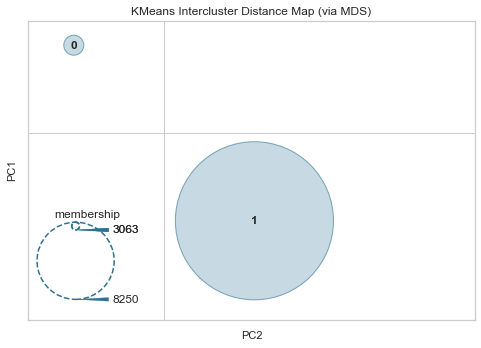

In [482]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
visualizer = InterclusterDistance(kmeans)

visualizer.fit(tweets_clust)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

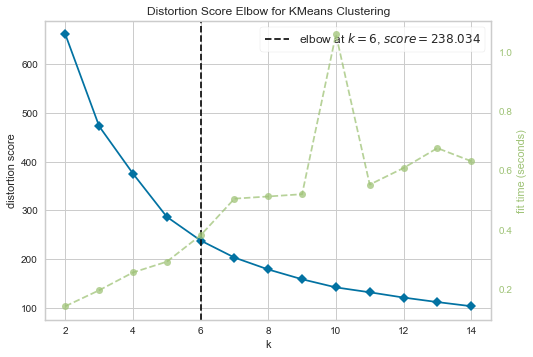

In [475]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(tweets_clust)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

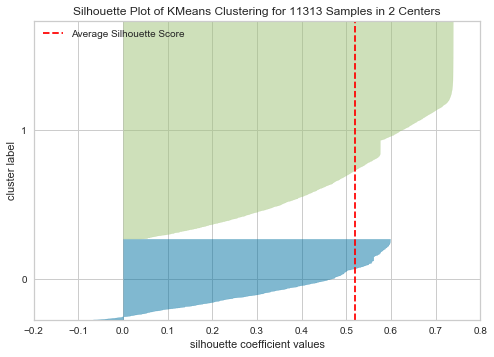

In [483]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(tweets_clust)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure